In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [152]:
df = pd.read_csv('../data/cleaned_data_v3.csv')

In [153]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [154]:
df.head()

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
0,Residential Apartment,Kolkata South,2.0,3662,0,5,570.5,srijan star swapno puron,NaN,1.0,Amtala,0.191,2,0,0
1,Residential Apartment,Kolkata South,3.0,10500,0,5,1115.5,natural quest,NaN,1.0,EM Bypass,1.175,6,0,0
2,Residential Apartment,Kolkata South,3.0,8900,0,5,1446.0,ganguly 4sight eminence,NaN,1.0,Garia,1.285,5,0,0
3,Residential Apartment,Kolkata South,3.0,5215,0,5,1295.0,dtc sojon,NaN,1.0,Joka,0.675,10,0,0
4,Residential Apartment,Kolkata South,2.0,5108,0,5,920.0,dtc sojon,NaN,1.0,Joka,0.470,10,0,0


In [155]:
df.shape

(6374, 15)

In [156]:
df.columns

Index(['PROPERTY_TYPE', 'CITY', 'BEDROOM_NUM', 'PRICE_PER_UNIT_AREA',
       'FURNISH', 'AGE', 'AREA', 'SOCIETY_NAME', 'BALCONY_NUM', 'FLOOR_NUM',
       'Location', 'price', 'no_of_landmarks', 'FEATURES_SCORE',
       'AMENITIES_SCORE'],
      dtype='object')

In [157]:
df = df.drop_duplicates()

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5711 entries, 0 to 6373
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PROPERTY_TYPE        5711 non-null   object 
 1   CITY                 5711 non-null   object 
 2   BEDROOM_NUM          5711 non-null   float64
 3   PRICE_PER_UNIT_AREA  5711 non-null   int64  
 4   FURNISH              5711 non-null   int64  
 5   AGE                  5711 non-null   int64  
 6   AREA                 5711 non-null   float64
 7   SOCIETY_NAME         5551 non-null   object 
 8   BALCONY_NUM          4732 non-null   float64
 9   FLOOR_NUM            5493 non-null   float64
 10  Location             5711 non-null   object 
 11  price                5711 non-null   float64
 12  no_of_landmarks      5711 non-null   int64  
 13  FEATURES_SCORE       5711 non-null   int64  
 14  AMENITIES_SCORE      5711 non-null   int64  
dtypes: float64(5), int64(6), object(4)
memory u

### Price

C:\Users\rouna\anaconda3\envs\my_deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

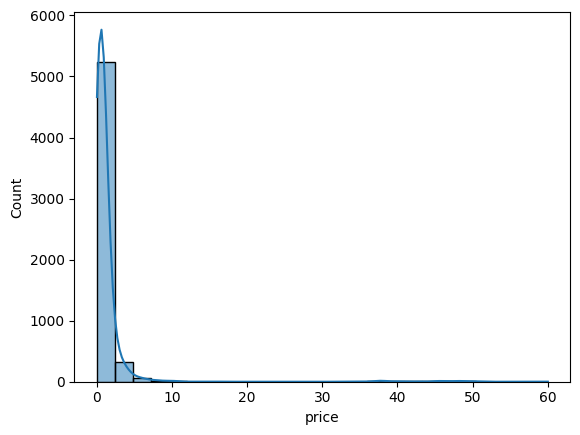

In [159]:
sns.histplot(df['price'], kde=True, bins=25)

<Axes: xlabel='price'>

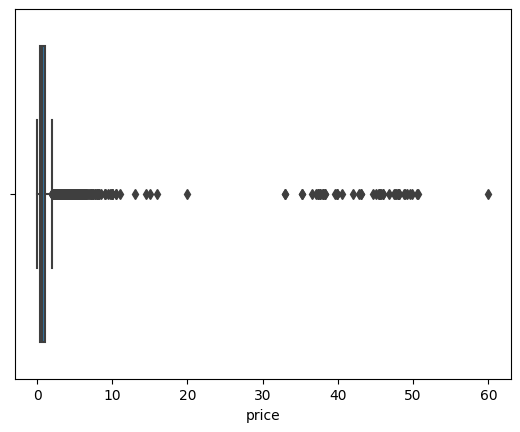

In [160]:
sns.boxplot(x=df['price'])

In [161]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(563,
 count    563.000000
 mean       7.578419
 std       11.870923
 min        2.020000
 25%        2.600000
 50%        3.250000
 75%        5.050000
 max       60.000000
 Name: price, dtype: float64)

In [162]:
outliers.sort_values('price',ascending=False).head(20)

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
2692,Independent House/Villa,Kolkata North,6.0,120000000,0,1,3599.0,NaN,2.0,NaN,Sector 2 Salt Lake,60.000,8,5,18
1113,Residential Apartment,Kolkata South,3.0,9895,0,5,1174.5,aagaman by rajat,NaN,1.0,Tollygunge,50.630,6,0,0
908,Residential Apartment,Kolkata East,3.0,8000,0,5,2220.0,jain dream one,NaN,1.0,New Town,50.485,7,0,0
608,Residential Apartment,Kolkata South,3.0,9660,0,5,1086.0,chitrakatha,NaN,1.0,Tollygunge,49.920,6,0,0
347,Residential Apartment,Kolkata North,3.0,7891,0,5,1425.0,orbit lumiere,NaN,1.0,BT Road,49.560,7,0,0
1250,Residential Apartment,Kolkata North,3.0,8876,0,5,1435.0,siddha eden lakeville,NaN,1.0,BT Road,49.165,7,0,0
1014,Residential Apartment,Kolkata South,3.0,7400,0,6,1477.0,sugam habitat,NaN,1.0,EM Bypass,48.860,10,0,0
859,Residential Apartment,Kolkata East,3.0,7000,0,6,1563.0,shrachi greenwood nest,NaN,1.0,New Town,48.840,12,0,0
88,Residential Apartment,Kolkata South,3.0,7100,0,5,1388.0,eden luxuria,NaN,1.0,Kalikapur,48.150,3,0,0
1287,Residential Apartment,Kolkata East,3.0,9047,0,5,1507.0,mani casa,NaN,1.0,New Town,48.090,6,0,0


In [163]:
df.drop(index=[2692], inplace=True)

One value is insane. So I simply dropped it. Others may be data errors. These can be said better after analysis the price/sqft and AREA column

### Price per Unit (Sqft)

C:\Users\rouna\AppData\Local\Temp\ipykernel_12852\3615754152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PRICE_PER_UNIT_AREA'])
C:\Users\rouna\anaconda3\envs\my_deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PRICE_PER_UNIT_AREA', ylabel='Density'>

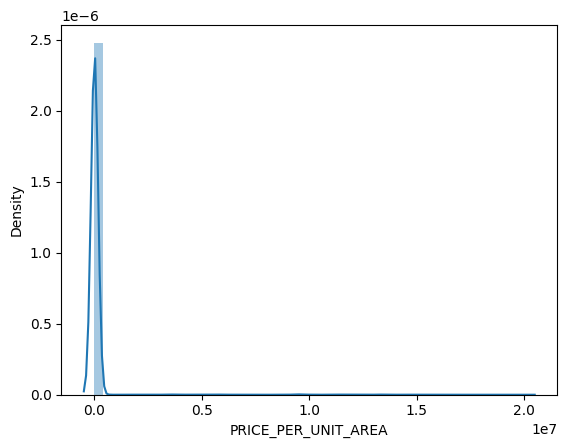

In [164]:
sns.distplot(df['PRICE_PER_UNIT_AREA'])

<Axes: xlabel='PRICE_PER_UNIT_AREA'>

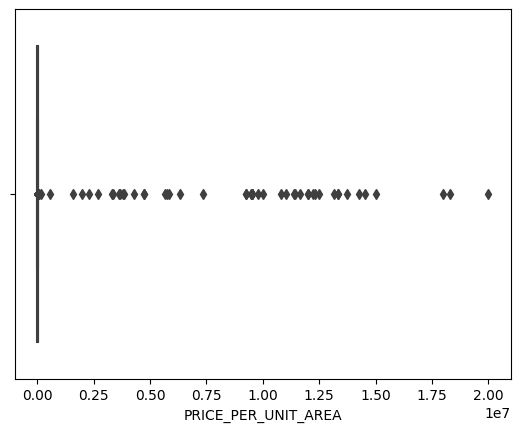

In [48]:
sns.boxplot(x=df['PRICE_PER_UNIT_AREA'])

In [165]:
# Calculate the IQR for the 'price' column
Q1 = df['PRICE_PER_UNIT_AREA'].quantile(0.25)
Q3 = df['PRICE_PER_UNIT_AREA'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['PRICE_PER_UNIT_AREA'] < lower_bound) | (df['PRICE_PER_UNIT_AREA'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['PRICE_PER_UNIT_AREA'].describe().apply(lambda x: format(x, 'f'))

num_outliers, outliers_sqft_stats

(343,
 count         343.000000
 mean      1275253.338192
 std       3590755.772210
 min         13362.000000
 25%         14452.000000
 50%         16265.000000
 75%         21499.000000
 max      20000000.000000
 Name: PRICE_PER_UNIT_AREA, dtype: object)

In [166]:
outliers_sqft.sort_values('PRICE_PER_UNIT_AREA',ascending=False).head(4)

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
5021,Independent House/Villa,Kolkata South,4.0,20000000,2,3,719.0,NaN,1.0,NaN,Elgin Road,2.0,6,0,0
5897,Independent House/Villa,Kolkata East,9.0,18303571,4,6,1612.0,NaN,4.0,NaN,Action Area 1,4.1,8,21,41
5565,Independent House/Villa,Kolkata North,16.0,18000000,1,1,2879.0,NaN,3.0,NaN,Salt Lake,7.2,5,55,119
5558,Independent House/Villa,Kolkata North,9.0,15000000,4,2,3599.0,NaN,3.0,NaN,Kankurgachi,7.5,9,47,99


In [53]:
#outliers_sqft.to_csv('outliers_sqft.csv', index=False)

In [167]:
outlier_sqft_more_onelakh = outliers_sqft[outliers_sqft['PRICE_PER_UNIT_AREA'] >100000]
outlier_sqft_more_onelakh.head()

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
216,Independent House/Villa,Kolkata North,10.0,5833334,4,3,3.0,NaN,4.0,NaN,Motilal Colony,1.75,4,5,17
230,Independent House/Villa,Kolkata East,3.0,4285714,1,1,5039.0,the vedic village,3.0,NaN,Rajarhat,3.00,1,39,68
305,Independent House/Villa,Kolkata North,6.0,140000,4,1,1076.0,east kamalapur,0.0,NaN,Airport,1.25,4,0,0
460,Independent House/Villa,Kolkata South,12.0,9259259,0,3,5054.0,NaN,1.0,NaN,Garia,6.50,1,0,0
891,Independent House/Villa,Kolkata South,2.0,3333333,2,3,2159.0,NaN,2.0,NaN,Panchasayar,1.00,9,0,0


In [168]:
outlier_sqft_more_onelakh['PRICE_PER_UNIT_AREA'] = round((outlier_sqft_more_onelakh['price']*10000000)/outlier_sqft_more_onelakh['AREA'])

C:\Users\rouna\AppData\Local\Temp\ipykernel_12852\3517448089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_sqft_more_onelakh['PRICE_PER_UNIT_AREA'] = round((outlier_sqft_more_onelakh['price']*10000000)/outlier_sqft_more_onelakh['AREA'])


In [64]:
outlier_sqft_more_onelakh['PRICE_PER_UNIT_AREA'] = outlier_sqft_more_onelakh['PRICE_PER_UNIT_AREA'].apply(lambda x: format(x, 'f'))

C:\Users\rouna\AppData\Local\Temp\ipykernel_12852\32293077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_sqft_more_onelakh['PRICE_PER_UNIT_AREA'] = outlier_sqft_more_onelakh['PRICE_PER_UNIT_AREA'].apply(lambda x: format(x, 'f'))


In [169]:
outlier_sqft_more_onelakh.head()

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
216,Independent House/Villa,Kolkata North,10.0,5833333.0,4,3,3.0,NaN,4.0,NaN,Motilal Colony,1.75,4,5,17
230,Independent House/Villa,Kolkata East,3.0,5954.0,1,1,5039.0,the vedic village,3.0,NaN,Rajarhat,3.00,1,39,68
305,Independent House/Villa,Kolkata North,6.0,11617.0,4,1,1076.0,east kamalapur,0.0,NaN,Airport,1.25,4,0,0
460,Independent House/Villa,Kolkata South,12.0,12861.0,0,3,5054.0,NaN,1.0,NaN,Garia,6.50,1,0,0
891,Independent House/Villa,Kolkata South,2.0,4632.0,2,3,2159.0,NaN,2.0,NaN,Panchasayar,1.00,9,0,0


In [170]:
outliers_sqft.update(outlier_sqft_more_onelakh)

In [171]:
outliers_sqft['PRICE_PER_UNIT_AREA'].describe().apply(lambda x: format(x, 'f'))

count         343.000000
mean       182019.606414
std       1305230.002162
min          1235.000000
25%         14072.000000
50%         15513.000000
75%         18499.000000
max      13333333.000000
Name: PRICE_PER_UNIT_AREA, dtype: object

In [172]:
outliers_sqft.sort_values('PRICE_PER_UNIT_AREA',ascending=False).head(20)

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
2701,Independent House/Villa,Kolkata North,5.0,13333333,0,1,3.0,NaN,1.0,NaN,Sector 2 Salt Lake,4.000,8,5,11
2698,Independent House/Villa,Kolkata North,4.0,13333333,0,1,3.0,NaN,2.0,NaN,Sector 3 Salt Lake,4.000,8,5,11
3043,Independent House/Villa,Kolkata East,4.0,9500000,2,5,1.0,greentech city vedic wellness villas,2.0,NaN,Rajarhat,0.950,7,12,51
6233,Independent House/Villa,Kolkata East,4.0,9000000,2,1,4.0,silver oak estate,2.0,NaN,Bablatala,3.600,6,39,57
216,Independent House/Villa,Kolkata North,10.0,5833333,4,3,3.0,NaN,4.0,NaN,Motilal Colony,1.750,4,5,17
6305,Independent House/Villa,Kolkata East,3.0,5750000,2,5,2.0,vedic aqua golf villa,3.0,NaN,Rajarhat,1.150,7,35,74
3756,Residential Apartment,Kolkata East,3.0,57333,2,1,150.0,on request,2.0,2.0,New Town,0.860,7,8,31
41,Residential Apartment,Kolkata North,3.0,48278,0,5,1270.0,oswal orchard amritaya,NaN,1.0,BT Road,46.785,7,0,0
5019,Independent/Builder Floor,Kolkata South,3.0,45454,0,1,1760.0,NaN,1.0,2.0,DEODAR STREET,8.000,7,0,0
6236,Residential Apartment,Kolkata Central,4.0,42416,2,6,7780.0,the 42,1.0,10.0,Park Street,33.000,6,15,49


In [173]:
outliers_sqft.drop(index=[2701,2698,3043,6233,216,6305], inplace=True)

C:\Users\rouna\AppData\Local\Temp\ipykernel_12852\2951479820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft.drop(index=[2701,2698,3043,6233,216,6305], inplace=True)


In [174]:
outliers_sqft['PRICE_PER_UNIT_AREA'].describe().apply(lambda x: format(x, 'f'))

count      337.000000
mean     16862.688427
std       6029.429068
min       1235.000000
25%      14069.000000
50%      15358.000000
75%      18333.000000
max      57333.000000
Name: PRICE_PER_UNIT_AREA, dtype: object

In [175]:
df.update(outliers_sqft)

In [176]:
df.drop(index=[2701,2698,3043,6233,216,6305], inplace=True)

C:\Users\rouna\AppData\Local\Temp\ipykernel_12852\3615754152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PRICE_PER_UNIT_AREA'])
C:\Users\rouna\anaconda3\envs\my_deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PRICE_PER_UNIT_AREA', ylabel='Density'>

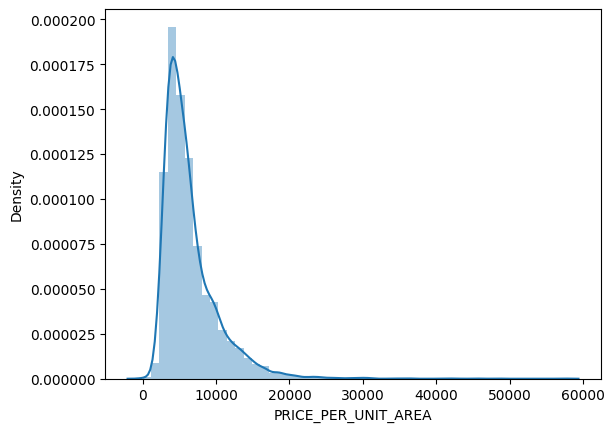

In [177]:
sns.distplot(df['PRICE_PER_UNIT_AREA'])

<Axes: xlabel='PRICE_PER_UNIT_AREA'>

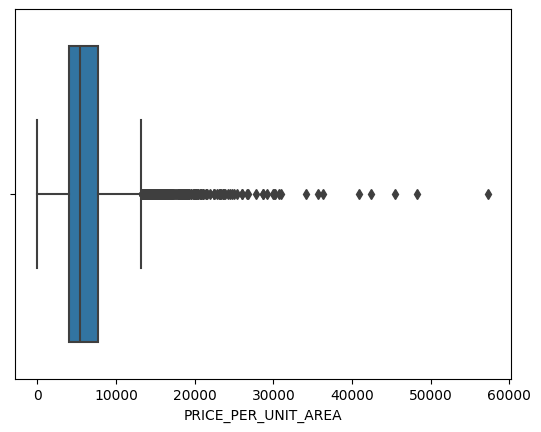

In [178]:
sns.boxplot(x=df['PRICE_PER_UNIT_AREA'])

<Axes: xlabel='PRICE_PER_UNIT_AREA'>

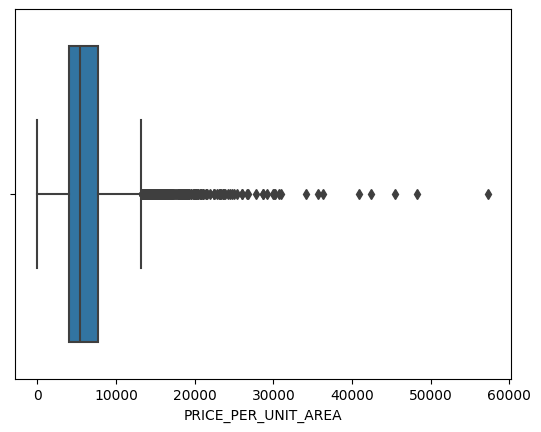

In [179]:
sns.boxplot(x=df['PRICE_PER_UNIT_AREA'])

In [180]:
df[df['PRICE_PER_UNIT_AREA']>45000]

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
41,Residential Apartment,Kolkata North,3.0,48278,0,5,1270.0,oswal orchard amritaya,NaN,1.0,BT Road,46.785,7,0,0
3756,Residential Apartment,Kolkata East,3.0,57333,2,1,150.0,on request,2.0,2.0,New Town,0.860,7,8,31
5019,Independent/Builder Floor,Kolkata South,3.0,45454,0,1,1760.0,NaN,1.0,2.0,DEODAR STREET,8.000,7,0,0


In [181]:
df = df[df['PRICE_PER_UNIT_AREA']<=45000]

<Axes: xlabel='PRICE_PER_UNIT_AREA'>

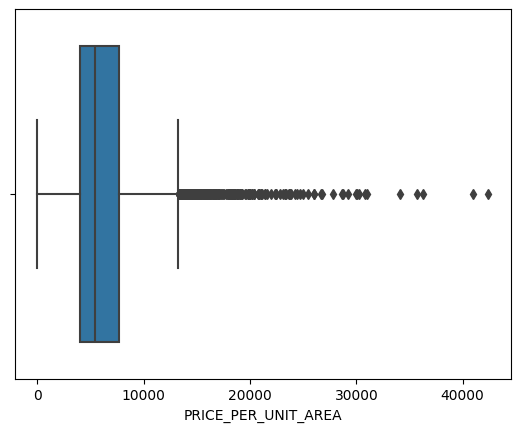

In [182]:
sns.boxplot(x=df['PRICE_PER_UNIT_AREA'])

### Area

C:\Users\rouna\AppData\Local\Temp\ipykernel_12852\1863738208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AREA'])
C:\Users\rouna\anaconda3\envs\my_deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AREA', ylabel='Density'>

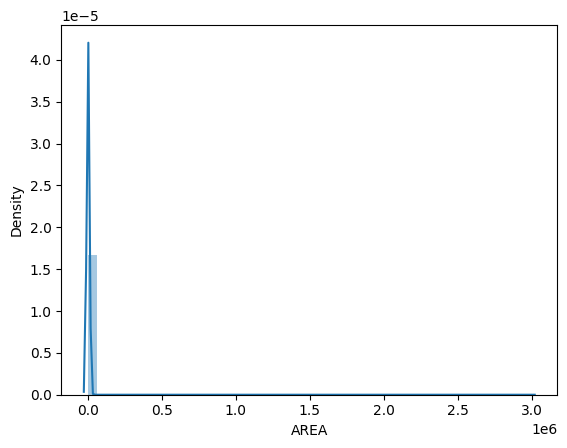

In [183]:
sns.distplot(df['AREA'])

<Axes: xlabel='AREA'>

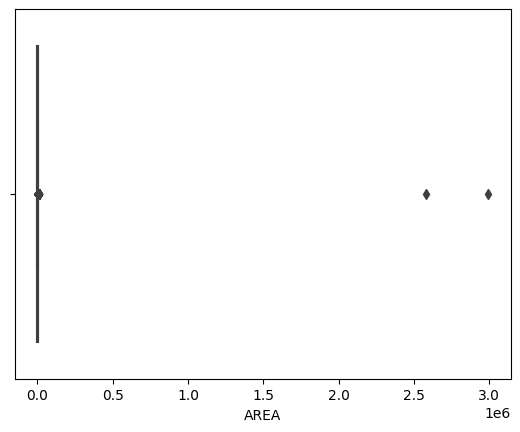

In [136]:
sns.boxplot(x=df['AREA'])

In [184]:
df['AREA'].describe().apply(lambda x: format(x, 'f'))

count       5701.000000
mean        2266.475969
std        52331.879370
min          255.000000
25%          862.500000
50%         1100.000000
75%         1457.000000
max      2994000.000000
Name: AREA, dtype: object

In [185]:
df[df['AREA'] > 100000]

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
2852,Residential Apartment,Kolkata North,2.0,0,2,5,2581176.0,mihir kunja,1.0,2.0,Sodepur,0.2570,4,0,0
6045,Residential Apartment,Kolkata East,2.0,1,2,1,2994000.0,anandi residency,1.0,3.0,Rajarhat,0.2994,5,8,47


In [186]:
df = df[df['AREA'] < 100000]

C:\Users\rouna\AppData\Local\Temp\ipykernel_12852\1863738208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AREA'])
C:\Users\rouna\anaconda3\envs\my_deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AREA', ylabel='Density'>

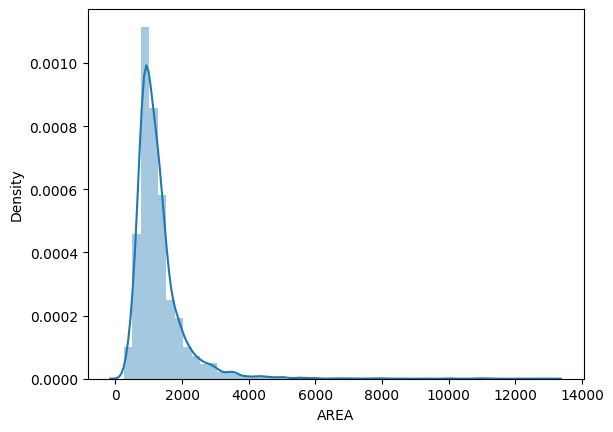

In [187]:
sns.distplot(df['AREA'])

<Axes: xlabel='AREA'>

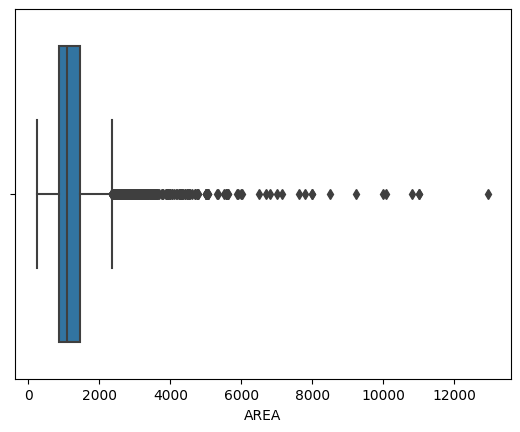

In [188]:
sns.boxplot(x=df['AREA'])

In [189]:
df[df['AREA'] > 10000].sort_values('AREA',ascending=False)

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
3368,Residential Apartment,Kolkata South,3.0,524,2,6,12956.0,primarc southwinds,1.0,10.0,EM Bypass,0.68,1,63,141
2060,Independent House/Villa,Kolkata East,22.0,3636,2,5,11000.0,NaN,4.0,NaN,Action Area 2,4.00,7,12,51
3454,Independent/Builder Floor,Kolkata East,24.0,7393,1,1,11000.0,NaN,4.0,2.0,Action Area 1,6.10,8,14,29
6284,Independent House/Villa,Kolkata East,6.0,3842,2,5,10800.0,"farm bungalows, vedic village",4.0,NaN,New Town,4.15,7,49,103
1402,Independent House/Villa,Kolkata North,12.0,4166,1,3,10080.0,NaN,4.0,NaN,Barat Colony,4.20,6,0,20


In [190]:
df[df['PRICE_PER_UNIT_AREA'] < 1000].sort_values('PRICE_PER_UNIT_AREA',ascending=False)

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
5954,Residential Apartment,Kolkata South,2.0,889,2,5,5619.0,merlin skygaze,1.0,0.0,EM Bypass,0.50,7,36,49
1225,Independent House/Villa,Kolkata West,4.0,740,4,3,4320.0,hare krishna nagar,1.0,NaN,Andul Road,0.32,5,0,0
3368,Residential Apartment,Kolkata South,3.0,524,2,6,12956.0,primarc southwinds,1.0,10.0,EM Bypass,0.68,1,63,141


In [191]:
df = df[df['PRICE_PER_UNIT_AREA'] > 1000]

In [193]:
df['AREA'].describe()

count     5696.000000
mean      1285.658093
std        762.695144
min        255.000000
25%        862.375000
50%       1100.000000
75%       1457.000000
max      11000.000000
Name: AREA, dtype: float64

### Bedroom

C:\Users\rouna\AppData\Local\Temp\ipykernel_12852\2710091368.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BEDROOM_NUM'])
C:\Users\rouna\anaconda3\envs\my_deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BEDROOM_NUM', ylabel='Density'>

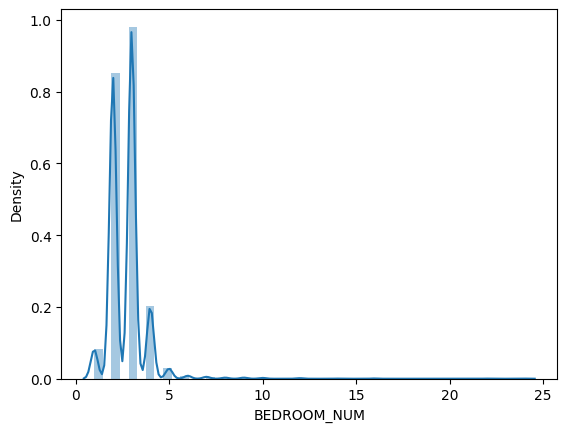

In [195]:
sns.distplot(df['BEDROOM_NUM'])

<Axes: xlabel='BEDROOM_NUM'>

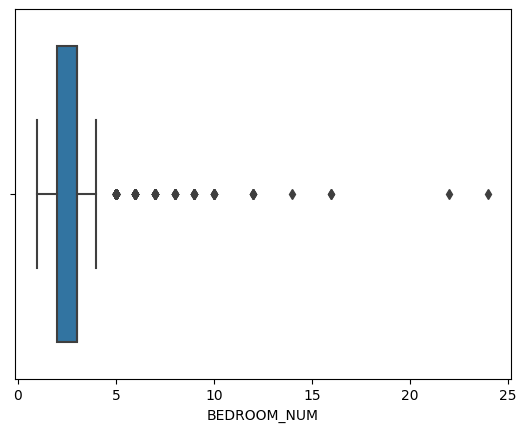

In [197]:
sns.boxplot(x=df['BEDROOM_NUM'])

In [196]:
df['BEDROOM_NUM'].describe()

count    5696.000000
mean        2.715239
std         1.048274
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        24.000000
Name: BEDROOM_NUM, dtype: float64

In [198]:
df[df['BEDROOM_NUM'] > 10].sort_values('BEDROOM_NUM',ascending=False)

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
3454,Independent/Builder Floor,Kolkata East,24.0,7393,1,1,11000.0,NaN,4.0,2.0,Action Area 1,6.1,8,14,29
2060,Independent House/Villa,Kolkata East,22.0,3636,2,5,11000.0,NaN,4.0,NaN,Action Area 2,4.0,7,12,51
5565,Independent House/Villa,Kolkata North,16.0,25009,1,1,2879.0,NaN,3.0,NaN,Salt Lake,7.2,5,55,119
5585,Independent House/Villa,Kolkata East,16.0,15788,4,1,3167.0,NaN,4.0,NaN,New Town,5.0,7,55,116
4982,Independent House/Villa,Kolkata South,14.0,14705,2,1,6800.0,house villa,4.0,NaN,Ballygunge Place,10.0,4,14,37
460,Independent House/Villa,Kolkata South,12.0,12861,0,3,5054.0,NaN,1.0,NaN,Garia,6.5,1,0,0
885,Independent House/Villa,Kolkata East,12.0,18610,4,6,1612.0,NaN,2.0,NaN,New Town Action Area 2D,3.0,6,12,33
1402,Independent House/Villa,Kolkata North,12.0,4166,1,3,10080.0,NaN,4.0,NaN,Barat Colony,4.2,6,0,20
4008,Independent House/Villa,Kolkata South,12.0,10000,2,6,10000.0,house,3.0,NaN,Ballygunge,10.0,5,5,30


In [199]:
df = df[df['BEDROOM_NUM'] <= 10]

C:\Users\rouna\AppData\Local\Temp\ipykernel_12852\2710091368.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BEDROOM_NUM'])
C:\Users\rouna\anaconda3\envs\my_deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BEDROOM_NUM', ylabel='Density'>

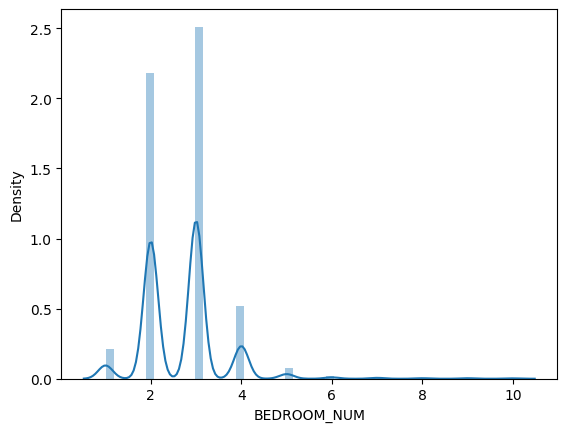

In [201]:
sns.distplot(df['BEDROOM_NUM'])

<Axes: xlabel='BEDROOM_NUM'>

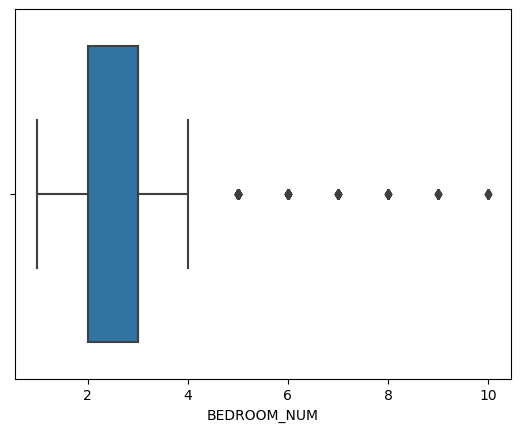

In [202]:
sns.boxplot(x=df['BEDROOM_NUM'])

In [200]:
df.shape

(5687, 15)

In [203]:
df.head(3)

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
0,Residential Apartment,Kolkata South,2.0,3662,0,5,570.5,srijan star swapno puron,NaN,1.0,Amtala,0.191,2,0,0
1,Residential Apartment,Kolkata South,3.0,10500,0,5,1115.5,natural quest,NaN,1.0,EM Bypass,1.175,6,0,0
2,Residential Apartment,Kolkata South,3.0,8900,0,5,1446.0,ganguly 4sight eminence,NaN,1.0,Garia,1.285,5,0,0


In [204]:
#df.to_csv('cleaned_data_v4.csv',index=False)

In [3]:
df = pd.read_csv('cleaned_data_v4.csv')

In [4]:
df.head(3)

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
0,Residential Apartment,Kolkata South,2.0,3662,0,5,570.5,srijan star swapno puron,NaN,1.0,Amtala,0.191,2,0,0
1,Residential Apartment,Kolkata South,3.0,10500,0,5,1115.5,natural quest,NaN,1.0,EM Bypass,1.175,6,0,0
2,Residential Apartment,Kolkata South,3.0,8900,0,5,1446.0,ganguly 4sight eminence,NaN,1.0,Garia,1.285,5,0,0


In [6]:
x = df[df['PRICE_PER_UNIT_AREA'] <= 20000]
(x['AREA']/x['BEDROOM_NUM']).quantile(0.01)

250.0

In [10]:
df[(df['AREA']/df['BEDROOM_NUM'])<250.0]

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
168,Residential Apartment,Kolkata South,3.0,8193,0,6,737.5,the 102,NaN,1.0,Joka,0.5500,6,0,0
197,Residential Apartment,Kolkata North,3.0,4951,0,5,720.0,mkbd mck tulip,NaN,1.0,Madhyamgram,0.3565,2,0,0
298,Independent House/Villa,Kolkata North,6.0,11617,4,1,1076.0,east kamalapur,0.0,NaN,Airport,1.2500,4,0,0
639,Residential Apartment,Kolkata East,3.0,7507,0,5,746.0,merlin rise,NaN,1.0,Rajarhat,0.5600,8,0,0
653,Residential Apartment,Kolkata South,3.0,8444,0,6,718.5,the 102,NaN,1.0,Joka,0.5500,6,0,0
707,Independent House/Villa,Kolkata North,7.0,11235,4,3,1513.0,NaN,2.0,NaN,Paikpara,1.7000,6,0,0
717,Independent House/Villa,Kolkata North,4.0,18857,4,3,875.0,NaN,2.0,NaN,Girish Park,1.6500,6,0,14
766,Independent/Builder Floor,Kolkata South,2.0,3368,2,3,475.0,NaN,1.0,2.0,Brahmapur,0.1600,7,28,46
780,Residential Apartment,Kolkata East,3.0,10192,0,5,677.0,merlin lakescape,NaN,1.0,New Town,0.6900,7,0,0
863,Residential Apartment,Kolkata South,3.0,8691,0,5,733.0,orchard godrej se7en,NaN,1.0,Joka,0.6379,7,0,0


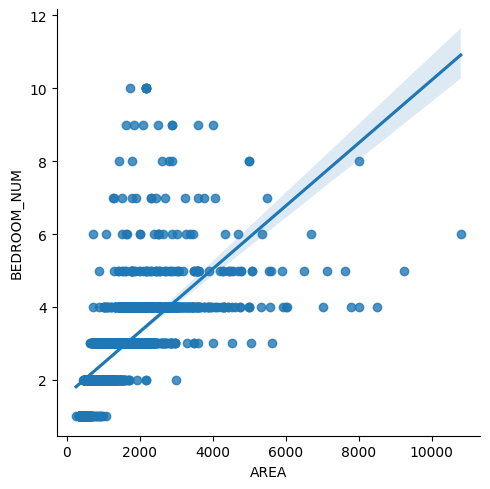

In [8]:
sns.lmplot(data=df, x='AREA',y='BEDROOM_NUM')

In [11]:
area_room_df = df[(df['AREA']/df['BEDROOM_NUM'])<250.0]

In [24]:
df['area_room_ratio'] = df['AREA']/df['BEDROOM_NUM']

In [29]:
df[df['area_room_ratio'] < 250.0].sort_values('area_room_ratio')

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE,area_room_ratio
1883,Independent House/Villa,Kolkata North,6.0,20833,2,3,720.0,NaN,3.0,NaN,Girish Park,1.5000,6,5,17,120.000000
4748,Independent House/Villa,Kolkata South,10.0,13144,2,3,1727.0,NaN,3.0,NaN,Jadavpur,2.2700,3,0,8,172.700000
4312,Residential Apartment,Kolkata North,5.0,3499,2,6,881.0,on request,1.0,1.0,Airport,0.3083,5,0,0,176.200000
5215,Independent House/Villa,Kolkata East,9.0,25434,4,6,1612.0,NaN,4.0,NaN,Action Area 1,4.1000,8,21,41,179.111111
298,Independent House/Villa,Kolkata North,6.0,11617,4,1,1076.0,east kamalapur,0.0,NaN,Airport,1.2500,4,0,0,179.333333
4348,Independent House/Villa,Kolkata South,4.0,27816,2,3,719.0,NaN,1.0,NaN,Elgin Road,2.0000,6,0,0,179.750000
3083,Independent House/Villa,Kolkata North,7.0,12301,4,2,1260.0,pintu villa,4.0,NaN,Phoolbagan,1.5500,5,5,32,180.000000
4366,Independent House/Villa,Kolkata South,8.0,9027,4,3,1440.0,NaN,2.0,NaN,Behala Manton,1.3000,6,0,36,180.000000
2715,Independent House/Villa,Kolkata North,7.0,4806,2,2,1290.0,private house,3.0,NaN,Sodepur,0.6200,4,12,33,184.285714
1835,Independent House/Villa,Kolkata South,9.0,7297,2,2,1850.0,NaN,2.0,NaN,Mahamayatala,1.3500,6,0,14,205.555556


In [27]:
(df[df['area_room_ratio'] < 250.0])['BEDROOM_NUM'].value_counts()

BEDROOM_NUM
3.0     20
2.0     19
10.0     6
7.0      3
9.0      3
6.0      2
4.0      2
8.0      2
5.0      1
Name: count, dtype: int64

In [30]:
df[(df['area_room_ratio']<250.0) & (df['BEDROOM_NUM']>4)]

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE,area_room_ratio
298,Independent House/Villa,Kolkata North,6.0,11617,4,1,1076.0,east kamalapur,0.0,NaN,Airport,1.2500,4,0,0,179.333333
707,Independent House/Villa,Kolkata North,7.0,11235,4,3,1513.0,NaN,2.0,NaN,Paikpara,1.7000,6,0,0,216.142857
1835,Independent House/Villa,Kolkata South,9.0,7297,2,2,1850.0,NaN,2.0,NaN,Mahamayatala,1.3500,6,0,14,205.555556
1883,Independent House/Villa,Kolkata North,6.0,20833,2,3,720.0,NaN,3.0,NaN,Girish Park,1.5000,6,5,17,120.000000
1993,Independent House/Villa,Kolkata South,10.0,13194,2,6,2160.0,NaN,4.0,NaN,Kasba,2.8500,5,5,30,216.000000
2000,Independent House/Villa,Kolkata South,10.0,13194,2,6,2160.0,NaN,4.0,NaN,EM Bypass,2.8500,6,5,12,216.000000
2003,Independent House/Villa,Kolkata East,10.0,13201,2,6,2159.0,raj apartment,4.0,NaN,EM Bypass,2.8500,6,5,16,215.900000
2004,Independent House/Villa,Kolkata South,10.0,13201,2,6,2159.0,raj apartment,4.0,NaN,Anandpur,2.8500,6,5,16,215.900000
2005,Independent House/Villa,Kolkata South,10.0,13201,2,6,2159.0,raj apartment,4.0,NaN,Madurdaha,2.8500,6,0,12,215.900000
2715,Independent House/Villa,Kolkata North,7.0,4806,2,2,1290.0,private house,3.0,NaN,Sodepur,0.6200,4,12,33,184.285714


In [31]:
df[(df['area_room_ratio']<250.0) & (df['BEDROOM_NUM']>4)].shape

(17, 16)

In [32]:
df = df[~((df['area_room_ratio']<250.0) & (df['BEDROOM_NUM']>4))]

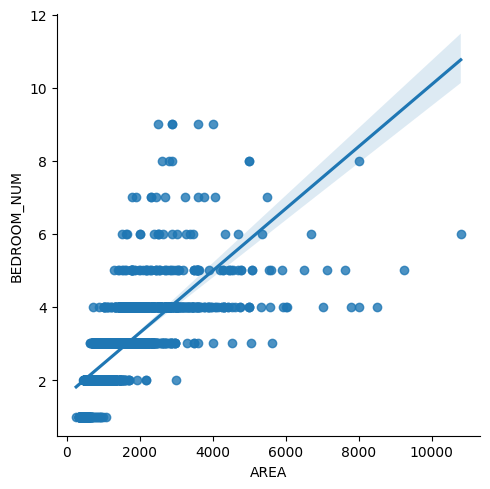

In [33]:
sns.lmplot(data=df,x='AREA',y='BEDROOM_NUM')

In [34]:
df.shape

(5670, 16)

In [35]:
#df.to_csv('cleaned_data_v5.csv',index=False)

In [36]:
df = pd.read_csv('../data/cleaned_data_v5.csv')

<Axes: xlabel='AREA', ylabel='price'>

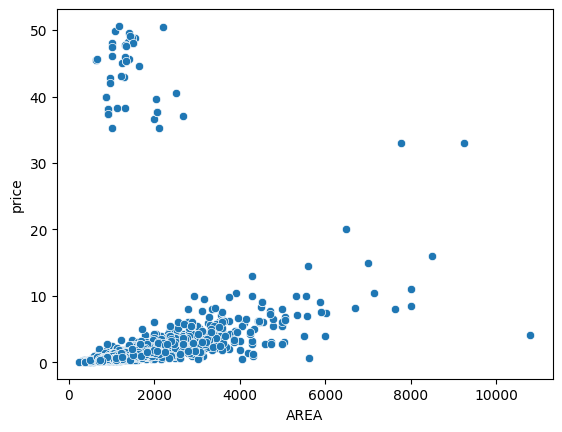

In [37]:
sns.scatterplot(data=df, x='AREA',y='price')

In [51]:
anomaly_df = df[(df['AREA'] < 3500) & (df['price'] >30.0)]

In [52]:
anomaly_df.shape

(50, 16)

In [53]:
anomaly_df

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE,area_room_ratio
87,Residential Apartment,Kolkata South,3.0,7100,0,5,1388.0,eden luxuria,NaN,1.0,Kalikapur,48.150,3,0,0,462.666667
105,Residential Apartment,Kolkata South,3.0,9579,0,5,962.0,merlin avana,NaN,1.0,Tollygunge,42.750,9,0,0,320.666667
109,Independent House/Villa,Kolkata East,4.0,3587,0,6,2520.0,dimitra shantineer,NaN,NaN,New Town,40.500,3,0,0,630.000000
114,Independent House/Villa,Kolkata South,4.0,4500,0,5,2000.0,oas lake life township,NaN,NaN,Joka,36.550,1,0,0,500.000000
291,Residential Apartment,Kolkata South,3.0,9612,0,5,921.0,merlin avana,NaN,1.0,Tollygunge,38.055,9,0,0,307.000000
330,Residential Apartment,Kolkata North,3.0,7891,0,5,1425.0,orbit lumiere,NaN,1.0,BT Road,49.560,7,0,0,475.000000
343,Residential Apartment,Kolkata East,2.0,10034,0,5,1019.0,mani casa,NaN,1.0,New Town,48.005,6,0,0,509.500000
502,Residential Apartment,Kolkata East,2.0,14443,0,5,652.0,ps one 10,NaN,1.0,New Town,45.505,6,0,0,326.000000
540,Residential Apartment,Kolkata South,3.0,5855,0,5,2063.5,the royal ganges,NaN,1.0,Maheshtala,37.655,8,0,0,687.833333
565,Residential Apartment,Kolkata South,4.0,4500,0,5,2117.0,southwinds,NaN,1.0,Garia,35.230,1,0,0,529.250000


In [54]:
anomaly_df['price'] = (anomaly_df['AREA'] * anomaly_df['PRICE_PER_UNIT_AREA'])/10000000

C:\Users\rouna\AppData\Local\Temp\ipykernel_1292\4246363884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df['price'] = (anomaly_df['AREA'] * anomaly_df['PRICE_PER_UNIT_AREA'])/10000000


In [55]:
anomaly_df['price'] = round(anomaly_df['price'],3)

C:\Users\rouna\AppData\Local\Temp\ipykernel_1292\1937401286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df['price'] = round(anomaly_df['price'],3)


In [56]:
anomaly_df

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE,area_room_ratio
87,Residential Apartment,Kolkata South,3.0,7100,0,5,1388.0,eden luxuria,NaN,1.0,Kalikapur,0.985,3,0,0,462.666667
105,Residential Apartment,Kolkata South,3.0,9579,0,5,962.0,merlin avana,NaN,1.0,Tollygunge,0.921,9,0,0,320.666667
109,Independent House/Villa,Kolkata East,4.0,3587,0,6,2520.0,dimitra shantineer,NaN,NaN,New Town,0.904,3,0,0,630.000000
114,Independent House/Villa,Kolkata South,4.0,4500,0,5,2000.0,oas lake life township,NaN,NaN,Joka,0.900,1,0,0,500.000000
291,Residential Apartment,Kolkata South,3.0,9612,0,5,921.0,merlin avana,NaN,1.0,Tollygunge,0.885,9,0,0,307.000000
330,Residential Apartment,Kolkata North,3.0,7891,0,5,1425.0,orbit lumiere,NaN,1.0,BT Road,1.124,7,0,0,475.000000
343,Residential Apartment,Kolkata East,2.0,10034,0,5,1019.0,mani casa,NaN,1.0,New Town,1.022,6,0,0,509.500000
502,Residential Apartment,Kolkata East,2.0,14443,0,5,652.0,ps one 10,NaN,1.0,New Town,0.942,6,0,0,326.000000
540,Residential Apartment,Kolkata South,3.0,5855,0,5,2063.5,the royal ganges,NaN,1.0,Maheshtala,1.208,8,0,0,687.833333
565,Residential Apartment,Kolkata South,4.0,4500,0,5,2117.0,southwinds,NaN,1.0,Garia,0.953,1,0,0,529.250000


In [57]:
df.update(anomaly_df)

<Axes: xlabel='AREA', ylabel='price'>

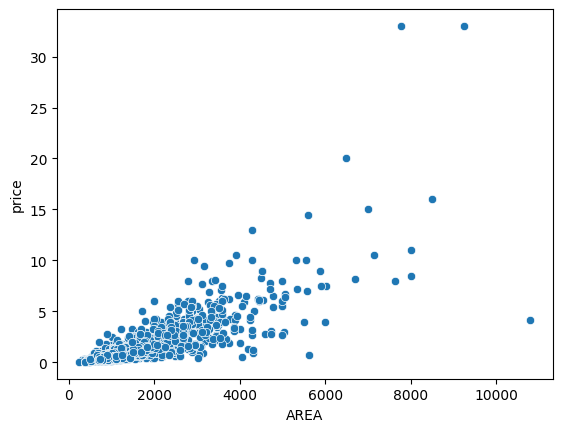

In [58]:
sns.scatterplot(data=df, x='AREA',y='price')

In [60]:
df.to_csv('cleaned_data_v6.csv',index=False)